## **1. Vectors, hyperplanes and projections** (8 pts)









 

Consider a vector space of two dimensions $(x_1, x_2)$, a point $A=(1,2)$ and a vector $\mathbf{v} = (1, 1)$.

a) What is the point defined by $\mathbf{v}$ considered as a position vector? If you move by one unit of length from point $A$ in the direction of $v$, what is the new point $B$ you will arrive at?


1.point (1,1) <br/>
2.unit vector = $v/||v|| = (1^2+1^2)/\sqrt{1+1} = 2/\sqrt{2}$ <br/>
point B= $(1+2/\sqrt{2}, 2+2/\sqrt{2}) $

**Answer 1(a)**

b) What is the position vector of a point $P$ derived by moving from point $A$ along $\mathbf{v}$ by a distance $s$? The result is a parametric representation of a line, where the parameter is $s$. The line contains $A$ and it is parallel to vector $\mathbf{v}$.

$P = A + Sv/||v|| = (1+2S/\sqrt{2}, 2+2S/\sqrt{2})$

**Answer 1(b)**

c) Find vector $\mathbf{u}$ that is perpendicular to vector $\mathbf{v}$ above.

$uv = 0$ <br/>
hence $u_1*1 +u_2*1=0$ <br/>
so $u_1+u_2=0$ <br/>
one possible solution: $u=(1,-1)$


**Answer 1(c)**

d) Given point $A$ and vector $\mathbf{u}$ perpendicular to the line, provide a vector equation that every point $P$ on the line must satisfy.
Reduce this equation to the form $ay_1 + by_2 = 1$, i.e. calculate $a$ and $b$ in terms of $A$ and $\mathbf{u}$.
$y_1, y_2$ are the coordinates of $P$. \\
>Hint: the inner product of vector $\mathbf{u}$ and a vector parallel to the line is zero.

Because it is perpendicular, so $u*(P-A)=0$ <br/>
so $u_1y_1+u_2y_2=uA$<br/>
$(u_1/uA)y_1+(u_2/uA)y_2=1$ <br/>
so we can have $a = u_1/uA,b=u_2/uA$


**Answer 1(d)**

e) Generalize part (d) to a plane in three dimensions, i.e. given point $A$ and vector $\mathbf{u}$ perpendicular to the plane, provide a vector equation that every point $P$ on the plane must satisfy.
 Can you reduce this equation to the form $ay_1 + by_2 + cy_3 = 1$, where $y_1, y_2, y_3$ are the coordinates of $P$? \\
 >Hint: the inner product of vector $\mathbf{u}$ with a vector parallel to the plane is zero.

 

Because it is perpendicular, so $u*(P-A)=0$ <br/>
so $u_1y_1+u_2y_2+u_3y_3=uA$<br/>
$(u_1/uA)y_1+(u_2/uA)y_2+(u_3/uA)y_3=1$ <br/>
so we can have $a = u_1/uA,b=u_2/uA,c=u_3/uA$

**Answer 1(e)**

f) Consider a plane in three dimensions defined by a point $A$ and a normal vector $\mathbf{u}$. Given a point $B$ not on the plane, find the projection $B'$ of point $B$ onto the plane.
*Hint*: You can make use of two properties about projection $B'$. One property is based on vector $B' - A$ being parallel to the plane. Another property is based on vector $B' - B$ being parallel to vector $\mathbf{u}$.

## **2.Vectorized gradient descent** (12 pts)

In [ ]:
import numpy as np
from sklearn import datasets
import plotly.express as px

In this question we are going to learn first hand how gradient descent works in the context of a toy dataset. Note that we are not making use of a validation strategy here by using a test set or cross-fold validation—which is something that would be otherwise generally recommended. This exercise focuses on the inner workings of gradient descent applied to the quadratic cost function that was learned in the Linear regression class. 
>Note : It’s important that the
code provided is well documented and that no other external package is used (pandas, numpy
are ok).

In [ ]:
X,y = datasets.make_regression(100,2,random_state= 42)
print(f'X shape: {X.shape}\ny shape:{y.shape}')

X shape: (100, 2)
y shape:(100,)


a) Given the values of **X**, we want to fit a linear regression model to predict the **y** values. We will implement a vectorized version of the gradient descent algorithm. Input (X) and target (y) are provided as arguments. X is modified (X_b) to account for the bias. The coefficients (Θ) have been initialized for you. The shape of the variables X, y, b have been given, use this as a guide to output appropriate shape.


 Fill in the missing variables inside the gradient descent iteration loop and return the updated cost_list and parameters.


In [ ]:
def LR(X,y,lr,iterations):
    # Initializations

    # Adding 1 column in X for bias
    b = np.ones((len(X),1))             # shape : (N,1)
    X_b = np.append(X,b,axis=1)         # Shape : (N, features+1)
    theta = np.zeros((X_b.shape[1],1))  # shape : (features+1 ,1)
    y = y.reshape(-1,1)                 # shape : (N,1)
    cost_list = []              


    # Gradient Descent
    # Fill Code Below
    for iter in range(iterations):
        
    # Compute y using initial values of parameters
        y_pred = np.dot(X_b, theta)

    # Compute loss  (Using mean squared error formula)
        loss = y_pred - y
        N = b.shape[0]
    # Compute the cost and append to cost_list. This would be later used for plotting.
        cost = np.sum(loss ** 2) / (2. * N)
        cost_list.append(cost)

    # Compute the average gradient of loss function with respect to theta.
    # gradient -> (y-t)*x
        gradient = np.dot(X_b.transpose(), loss / N)
    
    # Notice the (y_pred - y) is broadcasted along axis 1 for multiplication.


    # Perform an optimization step on the parameters manipulating theta using learning rate
        theta = theta - lr * gradient

    return cost_list, theta #cost_list,theta

    #write a small explanations, how you are able to solve this?
    

In [ ]:
def plot_losses(cost_list):
  """This function plots the cost_list"""
  fig = px.line(y= cost_list)
  fig.update_layout(title= "Loss vs Iteration",xaxis_title='Iteration',yaxis_title='Cost')
  return fig

In [ ]:
# Run this cell to view how loss changes with iterations
cost_list,theta = LR(X,y,0.01,100)
plot_losses(cost_list)

Below is a function that takes as input the parameters($\Theta$) and Input (X). Fill in the missing code to output the y value using the input parameters.

In [ ]:
# theta shape : (features+1 ,1)
def predict(theta, x):
  # Fill code below
  
  return np.dot(theta, x)

b) Compare this model with a solution computed in closed form. Input (X) and target (y) are provided as arguments. X is modified (X_b) to account for the bias. The function should return the optimum parameters($\theta$).


In [ ]:
from numpy.linalg import inv
def linear_direct(X,y):

  #initializations
  b = np.ones((len(X),1))             # shape : (N,1)
  X_b = np.append(X,b,axis=1)         # Shape : (N, features+1)
  
  # Fill code below
  theta = np.dot(inv(np.dot(X_b.transpose(), X_b)), np.dot(X_b.transpose(), y))
  return theta


In [ ]:
# parameters found by direct method
linear_direct(X,y).astype(int)

array([87, 74,  0])

In [ ]:
# parameters found by gradient descent
theta.astype(int)

array([[46],
       [47],
       [-3]])

c) Discuss how the choice of learning_rate and number of iterations in part (a) affects the fitting of the model?

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def plot_fit(X,y,lr,itr):
# code here
  cost_list, theta = LR(X,y,lr,itr)
  fig = px.line(y= cost_list)
  fig.update_layout(title= "Loss vs Iteration",xaxis_title='Iteration',yaxis_title='Cost')
  return fig

In [ ]:
plot_fit(X,y,0.001,100)

In [ ]:
plot_fit(X,y,0.01,1000)

In [ ]:
plot_fit(X,y,0.05,100)

In [ ]:
plot_fit(X,y,0.005,10000)



## **3.Classification** (10 pts)


In this question, you will experiment with different classification algorithms from Sklearn API on the [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/). 

In [ ]:
from sklearn import datasets

X,y = datasets.load_iris(return_X_y=True)


In [ ]:
#Uncomment to know more about the dataset
print(datasets.load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

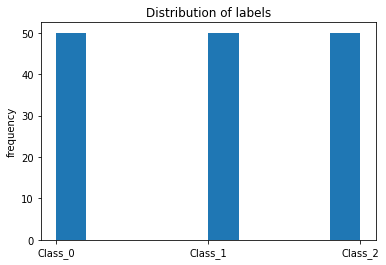

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
 # This shows the counts of labels 
def plot_distribution(y):
    plt.hist(y)
    plt.xticks([0,1,2],['Class_0','Class_1','Class_2'])
    plt.title('Distribution of labels')
    plt.ylabel("frequency")
    plt.show()

plot_distribution(y)

In [ ]:
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
dtype: int64

a) First your task is to divide the above dataset into 3 splits (i.e. training, validation and test sets) such that each split follows  approximately the same distribution of labels as the original dataset.The distribution of labels in the original dataset has been plotted for you above. The aim of this question is for you to read the [scikit-learn API](https://scikit-learn.org/stable/user_guide.html) and get comfortable with training/validation splits. 




Implement the following function to return 3 data splits in the ratio 7:1:2 (namely the training set, validation set and test set respectively) such that each split follows a similar distribution of labels.

>Hint : [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is a helpful sklearn function for this task.

In [ ]:
from sklearn.model_selection import train_test_split
def return_splits(X,y)-> (tuple):
  """This function should return three tuples, one for each split.
     where each tuple should contain (X_split,y_split) respectively. """

  # Code below
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

  train_set = X_train, y_train
  validation_set = X_validation, y_validation
  test_set = X_test, y_test

  return train_set,validation_set,test_set

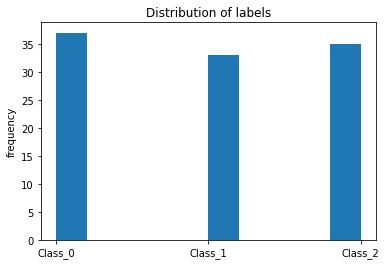

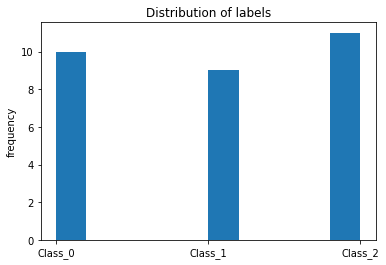

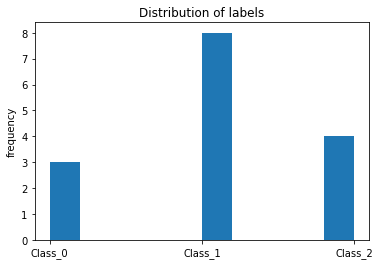

In [ ]:
#Run this cell to get your splits and plot the distribution of labels for each split.

train_set,validation_set,test_set = return_splits(X,y)

# The 3 plots should look similar.
plot_distribution(train_set[1])
plot_distribution(test_set[1])
plot_distribution(validation_set[1])

In this question you will experiment with two traditional classification models.The objective of this question is to demonstrate your ability to compare different machine learning models, and derive a conclusion
if possible. 

The models are: 
* [SVM Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Here we will use a different method to validate models, which is called k-fold cross validation ([Stratified K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)).



>Note: Since, here we would use k-fold cross validation. You do **not need** to use the splits defined in the previous question.

In [ ]:
X,y = datasets.load_iris(return_X_y=True)







b) For the SVM classifier, use the default parameters, and 5-fold cross validation, and report the
overall accuracy and confusion matrix, as well as accuracy and confusion matrix for each fold.
What is the standard deviation of accuracy over the folds?   


In [ ]:
# code here
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold


overall = list()  # create a list to store accuracy_score
kfold = KFold(n_splits=5)
for train, test in kfold.split(X):
  svm = SVC()
  
  #Train the model using the training sets and predict
  svm.fit(X[train], y[train])
  result = svm.predict(X[test])
  overall.append(accuracy_score(y[test], result))
  print("Accury: ", accuracy_score(y[test], result))
  print("Confusion matrix: \n", confusion_matrix(y[test], result))
overall_accuracy = np.mean(overall)
standard_deviation = np.std(overall)
print("Overall accuracy: ", overall_accuracy)
print("The standard deviation is: ", standard_deviation)

# Reference: https://machinelearningmastery.com/k-fold-cross-validation/


Accury:  1.0
Confusion matrix: 
 [[30]]
Accury:  1.0
Confusion matrix: 
 [[20  0]
 [ 0 10]]
Accury:  0.8333333333333334
Confusion matrix: 
 [[25  5]
 [ 0  0]]
Accury:  0.9333333333333333
Confusion matrix: 
 [[10  0]
 [ 2 18]]
Accury:  0.7
Confusion matrix: 
 [[ 0  0]
 [ 9 21]]
Overall accuracy:  0.8933333333333333
The standard deviation is:  0.11430952132988166


 c) For the Random Forest classifier, experiment with different numbers of trees in the forest using n_estimators    (range from 10, 20, 30 to 100).Experiment with other parameters as needed. Evaluate each
parameter selection using 5-fold cross validation, and report the overall accuracy and the
confusion matrix. Only report the interesting parameter settings.
>Hint: [Grid Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a helpful utility for this task.  



In [ ]:
# code here
from sklearn.ensemble import RandomForestClassifier
for number in range(10, 100, 10):  # step by 10
  overall = list() # create a list to store accuracy_score
  for train, test in kfold.split(X):
    clf = RandomForestClassifier(n_estimators=number)  #Create a Gaussian Classifier
    
    #Train the model using the training sets 
    clf.fit(X[train], y[train])
    y_pred=clf.predict(X[test])
    overall.append(accuracy_score(y[test], y_pred))
    print("Number of trees: ", number)
    print("Accury: ", accuracy_score(y[test], result))  
    print("Confusion matrix: \n", confusion_matrix(y[test], result))
  overall_accuracy = np.mean(overall)
  standard_deviation = np.std(overall)
  print("Overall accuracy: ", overall_accuracy)
  print("The standard deviation is: ", standard_deviation)


Number of trees:  10
Accury:  0.0
Confusion matrix: 
 [[ 0  9 21]
 [ 0  0  0]
 [ 0  0  0]]
Number of trees:  10
Accury:  0.1
Confusion matrix: 
 [[ 0  6 14]
 [ 0  3  7]
 [ 0  0  0]]
Number of trees:  10
Accury:  0.3
Confusion matrix: 
 [[ 9 21]
 [ 0  0]]
Number of trees:  10
Accury:  0.6333333333333333
Confusion matrix: 
 [[ 4  6]
 [ 5 15]]
Number of trees:  10
Accury:  0.7
Confusion matrix: 
 [[ 0  0]
 [ 9 21]]
Overall accuracy:  0.9066666666666666
The standard deviation is:  0.0997775303139718
Number of trees:  20
Accury:  0.0
Confusion matrix: 
 [[ 0  9 21]
 [ 0  0  0]
 [ 0  0  0]]
Number of trees:  20
Accury:  0.1
Confusion matrix: 
 [[ 0  6 14]
 [ 0  3  7]
 [ 0  0  0]]
Number of trees:  20
Accury:  0.3
Confusion matrix: 
 [[ 9 21]
 [ 0  0]]
Number of trees:  20
Accury:  0.6333333333333333
Confusion matrix: 
 [[ 4  6]
 [ 5 15]]
Number of trees:  20
Accury:  0.7
Confusion matrix: 
 [[ 0  0]
 [ 9 21]]
Overall accuracy:  0.9066666666666666
The standard deviation is:  0.099777530313971

In [ ]:
# We will report the accuracy and confusion matrix (train) from the best performing classifier.
print(f"Accuracy : {round(clf.best_score_,2)*100}%") 
plot_confusion_matrix(clf.best_estimator_,X,y)

 d) Summarize your findings from (a) and (b). What is the best performing classifier on the iris data set, considering the mean and standard deviation of accuracy of the two classifiers? 

Answer here: Random Forest classifier is the best performing classifier. Because the SVM classifier has similar overall accury as the Random Forest classifier, but it has higher standard deviation, so it is more likely to have a overfitting problem


## **4. Polynomial regression** (10 pts)




This question aims at applying polynomial regression (generating [Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) followed by [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) on a large data set and deciding the set of hyperparameters that best applies to this scenario.

a) Use the [Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) from scikit-learn and apply a polynomial regression with the full set of features. Experiment with polynomials of different degrees. Compare their performance with each other using a fixed training and testing partition (where the training set is 80% of the data set and the remainder for testing).  



In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
X, y = load_diabetes(return_X_y=True)

In [ ]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
#code here
for i in range(1,4):
  PolynomialFeatures = PolynomialFeatures(i)


b) Discuss the interpretation of the results.
Use visualizations of appropriate quantities to make sense of the results and support your interpretation.

In [ ]:
# plotting test vs train
